___


___
# Decision Trees and Random Forests in Python


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

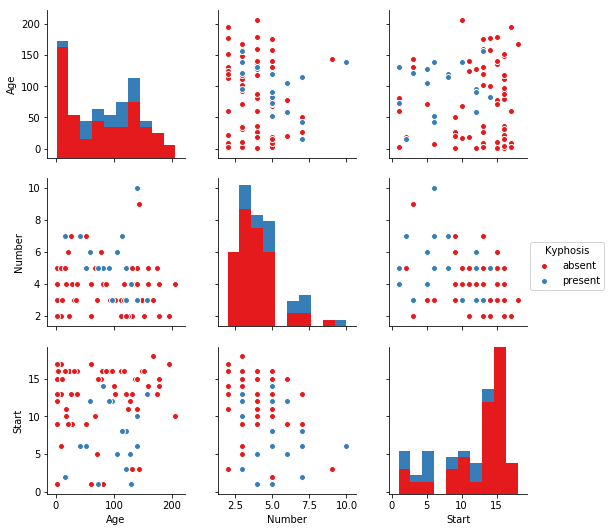

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.93      0.67      0.78        21
    present       0.30      0.75      0.43         4

avg / total       0.83      0.68      0.72        25



In [29]:
print(confusion_matrix(y_test,predictions))

[[14  7]
 [ 1  3]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [30]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [31]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

FileNotFoundError: [WinError 2] "dot.exe" not found in path.

## Random Forests

Now let's compare the decision tree model to a random forest.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,rfc_pred))

[[16  5]
 [ 1  3]]


In [35]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.94      0.76      0.84        21
    present       0.38      0.75      0.50         4

avg / total       0.85      0.76      0.79        25

